# APIs

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.svm import SVR

# UDFs

In [24]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

# Data Import

In [2]:
data = pd.read_csv('adult.data', index_col=False, names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
 'marital-status', 'occupation', 'relationship', 'race', 'gender',
 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
 'income'])

In [3]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
 'occupation', 'income']]

In [4]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
data.shape

(32561, 7)

# One-Hot-Encoding

In [6]:
print(f'Original Features:\n{data.columns}\n')
data_dummies = pd.get_dummies(data)
print(f'Features after dummy encoding:\n{data_dummies.columns}')

Original Features:
Index(['age', 'workclass', 'education', 'gender', 'hours-per-week',
       'occupation', 'income'],
      dtype='object')

Features after dummy encoding:
Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', '

In [7]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [16]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

X = features.values
y = data_dummies['income_ >50K'].values
print(f'X.shape: {X.shape}\ny.shape: {y.shape}')

X.shape: (32561, 44)
y.shape: (32561,)


# Applying Logistic Regression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
print(f'Test score: {logreg.score(X_test, y_test):.2f}')

Test score: 0.81


# Binning (Discretization)

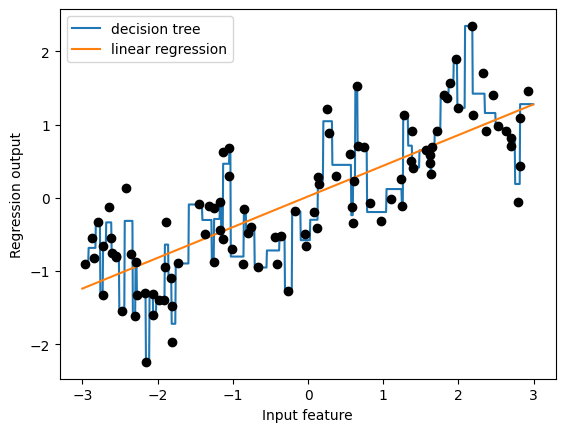

In [25]:
X, y = make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

below will create 10 bins

In [22]:
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [26]:
which_bin = np.digitize(X, bins=bins)
print(f'Data points:\n{X[:5]}')
print(f'\nBin membership: \n{which_bin[:5]}')

Data points:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership: 
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [30]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


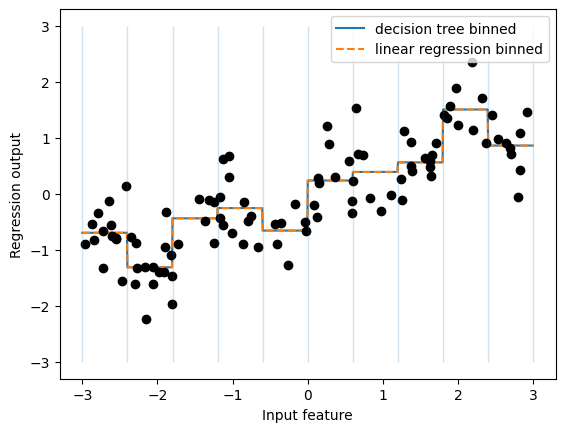

In [32]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned),'--', label='linear regression binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=0.2)
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

# Interactions and Polynomials

adding back original feature in the model

In [33]:
X_combined = np.hstack([X, X_binned])

print(X_combined.shape)

(100, 11)


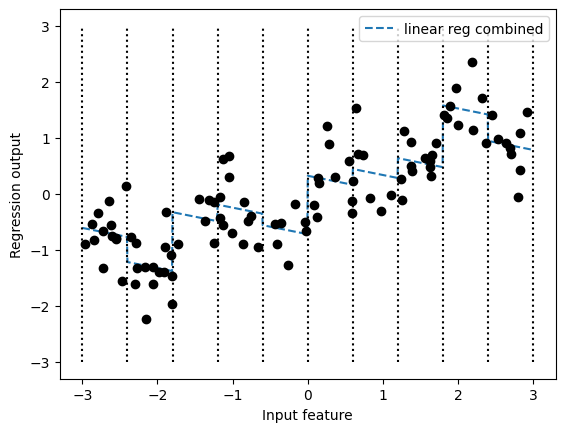

In [35]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), '--', label='linear reg combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

this gives same slope for all the bins. 

Below code tries to capture interaction which bin a data point is in

In [36]:
X_prod = np.hstack([X_binned, X * X_binned])
print(X_prod.shape)

(100, 20)


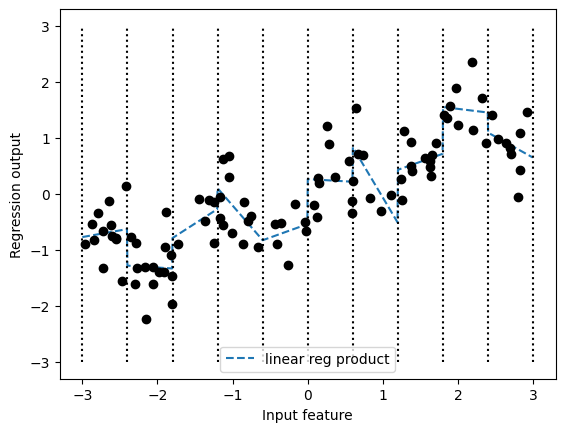

In [37]:
reg = LinearRegression().fit(X_prod, y)

line_prod = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_prod), '--', label='linear reg product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

In [39]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print(f'shape of poly X: {X_poly.shape}')

shape of poly X: (100, 10)


In [41]:
print(f'values for X_poly:\n{X_poly[:2]}')

values for X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]]


In [43]:
print(f'feature names:\n{poly.get_feature_names_out()}')

feature names:
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


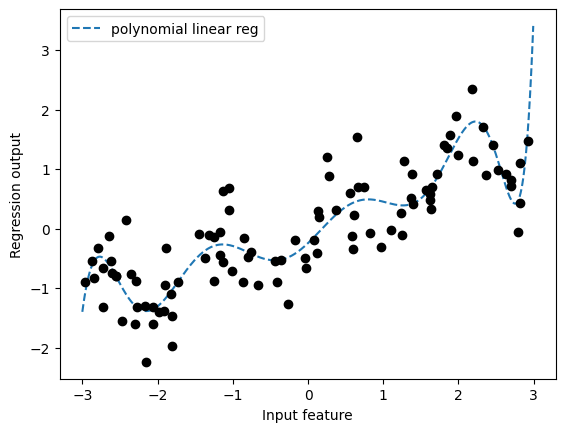

In [44]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), '--', label='polynomial linear reg')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

extreme results on the boundaries: -3 & 3

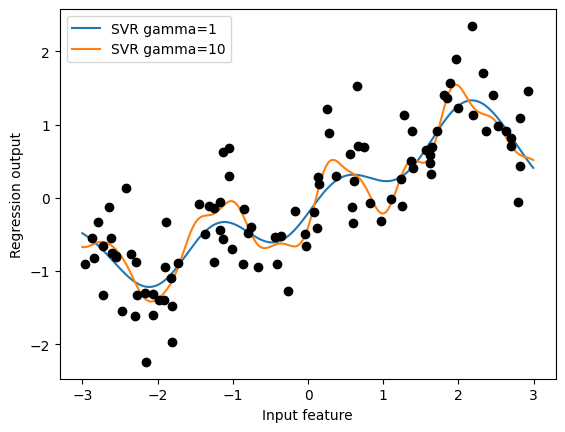

In [46]:
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label=f'SVR gamma={gamma}')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()